In [6]:
from numpy import * 

In [7]:
def loadData():
    dataMat = []
    labelMat = []
    file = open('data.txt')
    for line in file.readlines():
        arr = line.strip().split('\t')
        #print(arr)
        dataMat.append([1, float(arr[0]), float(arr[1])])
        labelMat.append(int(arr[2]))
    #print(dataMat,'\n',labelMat)
    return dataMat, labelMat
    
# loadData()

In [8]:
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

In [9]:
# 梯度计算
# dataMatIn是2维Numpy数组，每列对应不同特征，每行是一个训练样本
# 现在里面有X0，X1,X2的100*3的矩阵
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)             #转化为Numpy矩阵
    labelMat = mat(classLabels).transpose() #由行向量转化为列向量,矩阵的转置
    m,n = shape(dataMatrix)
    # 步长
    alpha = 0.001
    # 迭代次数
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        # 每一个样本乘上一个回归系数
        h = sigmoid(dataMatrix*weights)     #矩阵相乘，h是一个列向量 1*100
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error #按差值方向调整回归系数
    return weights

dataMatIn, classLabels = loadData()
print(gradAscent(dataMatIn, classLabels))


[[0.57128563]
 [3.11868207]
 [2.87133631]]


data的形状： (100, 3)


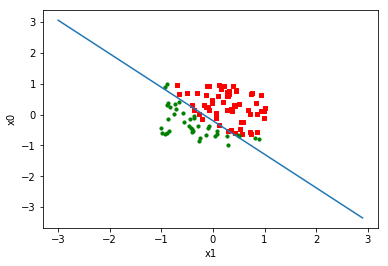

In [15]:
# import matplotlib as plt
import matplotlib.pyplot as plt
#将分类给画出来，画出最佳的拟合直线  
def plotBestFit(weights):  
    """ 
    :param weights: 最佳回归系数数组 
    :return: 
    """  
    dataMat, labelMat = loadData()       #加载数据集，返回数据集合分类  
    dataArr = array(dataMat)        #将数据集数组化  
    dataShape = shape(dataArr)      #data的形状  
    print("data的形状：", dataShape)  
    n = dataShape[0]        #形状的第一个是行数（即数据集的个数），第二个是列数（即数据集的特征）  
    xcord1 = []     #分类为1的点  
    ycord1 = []  
    xcord0 = []     #分类为0的点  
    ycord0 = []  
    for i in range(n):  
        if int(labelMat[i]) == 1:       #如果分类为1，添加到1分类的点集，否者返回到0分类的点集  
            xcord1.append(dataArr[i, 1])        #这个dataArr有3列，其中第0列为1，第1,2列为x，y  
            ycord1.append(dataArr[i, 2])  
        else:  
            xcord0.append(dataArr[i, 1])  
            ycord0.append(dataArr[i, 2])  
    fig = plt.figure()      #figure()函数创建一个新的图  
    ax = fig.add_subplot(111)       #add_subplot()函数在一张figure里面生成多张子图参数111，表示1行1列第1个位置  
    ax.scatter(xcord1, ycord1, s=10, c='red', marker='s')       #散点图  
    ax.scatter(xcord0, ycord0, s=10, c='green')  
    # 直线 x 的范围  
    x = arange(-3.0, 3.0, 0.1)      # (start, end, step)可以调step执行起来，看看图  
    # 画出直线，weights[0]*1.0+weights[1]*x+weights[2]*y=0  
    # 之前计算时对原始数据做了拓展，将两维拓展为三维，第一维全部设置为1.0，实际他是一个 y=ax+b, b常量  
    y = (-weights[0]-weights[1]*x)/weights[2]  
    ax.plot(x, y)       #画出直线  
    plt.xlabel('x1')        #X轴标记为x1  
    plt.ylabel('x0')        #Y轴标记为x0  
    plt.show()  

dataMatIn, classLabels = loadData()
plotBestFit(gradAscent(dataMatIn, classLabels).getA())  #getA()将weights矩阵转换为数组，getA()函数与mat()函数的功能相反  
# """ 
# 如果是矩阵的话会报这样的错： 
# "have shapes {} and {}".format(x.shape, y.shape)) 
# ValueError: x and y must have same first dimension, but have shapes (60,) and (1, 60) 
# 为啥要用数组呢？因为 x = arange(-3.0, 3.0, 0.1)，len(x) = [3-(-3)]/0.1 = 60 
# 而weights是矩阵的话，y = (-weights[0]-weights[1]*x)/weights[2]，len(y) = 1，有60个x，y只有一个，你这样都画不了线 
# 而weights是数据的话，len(y) = 60 
# """  